# Chicago Crime Data Analysis 
####  Part 1

*Christina Brockway*

In [1]:
#!pip install holidays

use a prepared zip file with the Chicago Crime Data:
https://drive.google.com/file/d/1avxUlCAros-R9GF6SKXqM_GopzO7VwA5/view?usp=drive_link

**Original Source is the Chicago Data Portal: Crimes 2001 to Present**

**Data Description**
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data

-  includes type of crime, exact data/time, lat/long, District/ward, was there an arrest,....

### Data Dictionary

Taken from: data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"><span style="font-weht:bd">**Name**</span></th>
    <th class="tg-0pky"><span style="font-wght:bd">**dtype**</span></th>
    <th class="tg-0pky"><span style="font-ight:bold">Description**</span></th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">ID</td>
    <td class="tg-0pky">int64</td>
    <td class="tg-0pky">Unique identifier for the record</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">object</td>
    <td class="tg-0pky">Date incident occured</td>
    <td class="tg-0pky">date/time</td>
  </tr>
  <tr>
    <td class="tg-0pky">Primary Type</td>
    <td class="tg-0pky">object</td>
    <td class="tg-0pky">Primary description of the IL Uniform Crime Reporting code</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Description</td>
    <td class="tg-0pky">object </td>
    <td class="tg-0pky">Secondary description of IUCR code</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Location Description</td>
    <td class="tg-0pky">object </td>
    <td class="tg-0pky">Location where incident occurred</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Arrest</td>
    <td class="tg-0pky">bool</td>
    <td class="tg-0pky">was an arrest made? </td>
    <td class="tg-0pky">true/false</td>
  </tr>
  <tr>
    <td class="tg-0pky">Domestic</td>
    <td class="tg-0pky">bool</td>
    <td class="tg-0pky">was the incident domestic related? </td>
    <td class="tg-0pky">true/false</td>
  </tr>
  <tr>
    <td class="tg-0pky">Beat</td>
    <td class="tg-0pky">int64</td>
    <td class="tg-0pky">beat where occured, Beat: smallest geo area deidcate police beat car</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">District</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">indicates district where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ward</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">indicates city council district/ward where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Latitude</td>
    <td class="tg-0pky">float64 </td>
    <td class="tg-0pky">latitude where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Longitude</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">longitude where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
</tbody>
</table>

# Task:
A reporter for a local newspaper has a series of questions related to crime rates in Chicago. 

### Imports

In [2]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import datetime as dt
import statsmodels.tsa.api as tsa

import holidays
from holidays import country_holidays

In [3]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

### Load Data

In [4]:
folder = "data/*Crime*.csv"
crime_files = sorted(glob.glob(folder, recursive=True))
df = pd.concat([pd.read_csv(f) for f in crime_files])


# Reset index after concatenation
df.reset_index(drop=True, inplace=True)

In [5]:
df.head(3).tail(3)

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877
2,2001-01-01 01:00:00,1310824,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15426218 entries, 0 to 15426217
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   ID                    int64  
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 1.2+ GB


In [7]:
# Convert 'Date' column to datetime objects
df['Datetime'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15426218 entries, 0 to 15426217
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   ID                    int64         
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
 12  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 1.3+ GB


In [9]:
df.loc[0,"Datetime"]

Timestamp('2001-01-01 01:00:00')

In [10]:
df

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
1,2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00
2,2001-01-01 01:00:00,1310824,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00
3,2001-01-01 01:00:00,1313086,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00
4,2001-01-01 01:00:00,1310858,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15426213,12/31/2022 12:50:00 PM,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,2022-12-31 12:50:00
15426214,12/31/2022 12:50:00 PM,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,2022-12-31 12:50:00
15426215,12/31/2022 12:52:00 AM,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,2022-12-31 00:52:00
15426216,12/31/2022 12:52:00 PM,12938420,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,2022-12-31 12:52:00


In [11]:
ts = df.copy()
ts.isna().sum()

Date                          0
ID                            0
Primary Type                  0
Description                   0
Location Description      21856
Arrest                        0
Domestic                      0
Beat                          0
District                     94
Ward                    1229692
Latitude                 177370
Longitude                177370
Datetime                      0
dtype: int64

In [12]:

ts=ts.drop(columns = ["Ward", "Latitude", "Longitude"])
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15426218 entries, 0 to 15426217
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   ID                    int64         
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 971.0+ MB


In [13]:
ts.duplicated().sum()

0

In [14]:
ts['Year']=ts['Datetime'].dt.year

In [15]:
ts['Month']=ts['Datetime'].dt.month

In [16]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15426218 entries, 0 to 15426217
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   ID                    int64         
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Datetime              datetime64[ns]
 10  Year                  int64         
 11  Month                 int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 1.2+ GB


In [17]:
ts.head()

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Datetime,Year,Month
0,2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,2001-01-01 01:00:00,2001,1
1,2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,2001-01-01 01:00:00,2001,1
2,2001-01-01 01:00:00,1310824,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,2001-01-01 01:00:00,2001,1
3,2001-01-01 01:00:00,1313086,THEFT,OVER $500,OTHER,False,False,1732,17.0,2001-01-01 01:00:00,2001,1
4,2001-01-01 01:00:00,1310858,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,2001-01-01 01:00:00,2001,1


In [18]:
ts.tail()

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Datetime,Year,Month
15426213,12/31/2022 12:50:00 PM,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,2022-12-31 12:50:00,2022,12
15426214,12/31/2022 12:50:00 PM,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,2022-12-31 12:50:00,2022,12
15426215,12/31/2022 12:52:00 AM,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,2022-12-31 00:52:00,2022,12
15426216,12/31/2022 12:52:00 PM,12938420,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,2022-12-31 12:52:00,2022,12
15426217,12/31/2022 12:59:00 PM,12939906,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,1511,15.0,2022-12-31 12:59:00,2022,12


In [19]:
#Set index column to datetime
ts = ts.set_index('Datetime')
ts.head(2)


,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Year,Month
Datetime,,,,,,,,,,,
2001-01-01 01:00:00,2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,2001,1
2001-01-01 01:00:00,2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,2001,1


In [20]:
# Confirm the type of the index
print(ts.index)

# Ensure that the index is sorted chronologically
print(ts.index.is_monotonic_increasing)

# Check for duplicate datetime values in the index
print(ts.index.duplicated().any())


DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2022-12-31 12:41:00', '2022-12-31 00:42:00',
               '2022-12-31 00:44:00', '2022-12-31 00:45:00',
               '2022-12-31 12:45:00', '2022-12-31 12:50:00',
               '2022-12-31 12:50:00', '2022-12-31 00:52:00',
               '2022-12-31 12:52:00', '2022-12-31 12:59:00'],
              dtype='datetime64[ns]', name='Datetime', length=15426218, freq=None)
False
True


In [21]:
ts.sort_index(inplace=True)

# Ensure that the index is sorted chronologically
print(ts.index.is_monotonic_increasing)

True


## Senario 1:  Comparing Crimes Across the Years

Q1.  Looking at crimes from 2001 to 2022, is there an increase or decrease in the overall crime rate?
Q2.  Are there any individual crimes that are going the opposite of the trend?

#### Q1.  Looking at crimes from 2001 to 2022, is there an increase or decrease in the overall crime rate?

In [22]:
crimes_by_year = ts.groupby('Year').size()
crimes_by_year.head(2)

Year
2001    971772
2002    973614
dtype: int64

NameError: name 'lr' is not defined

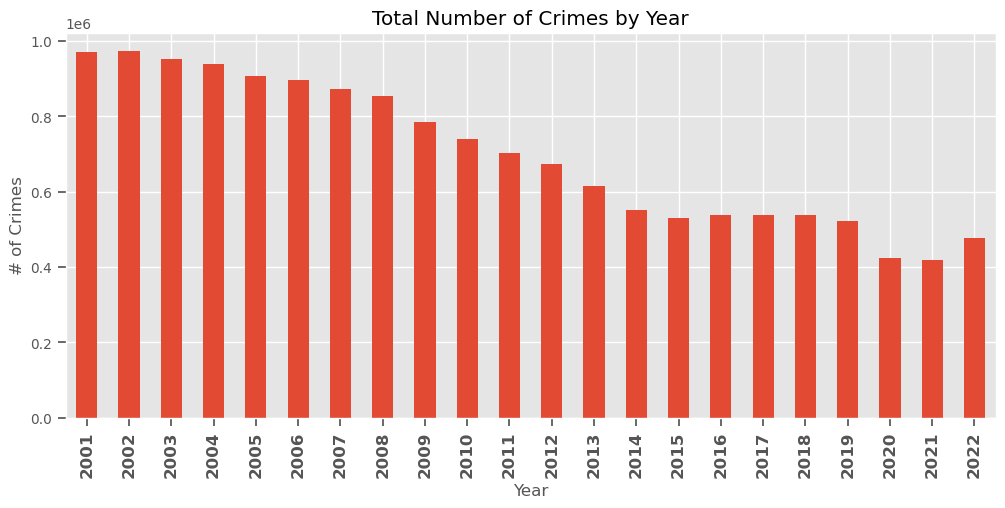

In [51]:
ax = plt.figure(figsize=(12,5))
ax= crimes_by_year.plot(kind='bar', legend=False,
                              title='Total Number of Crimes by Year', ylabel='# of Crimes')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(),fontsize='large', fontweight='bold')
ax.plot(crimes_by_year, lr.coef_*crimes_by_year+lr.intercept_, color='purple');

#### Q2.  Are there any individual crimes that are doing the opposite?

In [24]:
ts['Year'] = ts.index.year
ts.head(3)

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Year,Month
Datetime,,,,,,,,,,,
2001-01-01,01/01/2001 12:00:00 AM,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,2001,1
2001-01-01,01/01/2001 12:00:00 AM,2676160,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,921,9.0,2001,1
2001-01-01,01/01/2001 12:00:00 AM,9755209,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,2001,1


In [29]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15426218 entries, 2001-01-01 00:00:00 to 2022-12-31 23:55:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   ID                    int64  
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Year                  int64  
 10  Month                 int64  
dtypes: bool(2), float64(1), int64(4), object(4)
memory usage: 1.2+ GB


In [33]:
#Slice columns for this analysis
cols =['Primary Type', 'Year']
temp = ts[cols].copy()
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15426218 entries, 2001-01-01 00:00:00 to 2022-12-31 23:55:00
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Year          int64 
dtypes: int64(1), object(1)
memory usage: 353.1+ MB


In [34]:
temp.nunique()

Primary Type    36
Year            22
dtype: int64

In [35]:
type_crime = temp['Primary Type'].value_counts().to_frame('Total # of Crimes')
type_crime

,Total # of Crimes
THEFT,3253984
BATTERY,2821778
CRIMINAL DAMAGE,1757828
NARCOTICS,1492310
ASSAULT,1002206
OTHER OFFENSE,958348
BURGLARY,844492
MOTOR VEHICLE THEFT,733172
DECEPTIVE PRACTICE,681916
ROBBERY,579354


In [36]:
#create a dictionary for just types of crime
crime_dict = {}
crime= 'THEFT'
crime

'THEFT'

In [38]:
#Save a temporary df for just rows of crime
tempdf = temp.loc[temp['Primary Type'] == crime]
tempdf.head(3)

,Primary Type,Year
Datetime,,
2001-01-01,THEFT,2001
2001-01-01,THEFT,2001
2001-01-01,THEFT,2001


In [39]:
year_sample=tempdf.resample("Y").size()
year_sample.head()

Datetime
2001-12-31    198554
2002-12-31    196664
2003-12-31    197752
2004-12-31    190926
2005-12-31    171368
Freq: A-DEC, dtype: int64

In [40]:
crime_dict[crime] = year_sample.copy()
crime_dict.keys()

dict_keys(['THEFT'])

In [41]:
crime_dict['THEFT']

Datetime
2001-12-31    198554
2002-12-31    196664
2003-12-31    197752
2004-12-31    190926
2005-12-31    171368
2006-12-31    172480
2007-12-31    170312
2008-12-31    176874
2009-12-31    161952
2010-12-31    153514
2011-12-31    150306
2012-12-31    150930
2013-12-31    143070
2014-12-31    123136
2015-12-31    114700
2016-12-31    123242
2017-12-31    128772
2018-12-31    130572
2019-12-31    124982
2020-12-31     82642
2021-12-31     81596
2022-12-31    109640
Freq: A-DEC, dtype: int64

In [43]:
#Create a for loop
crime_list = ts['Primary Type'].unique()
crime_list

array(['THEFT', 'SEX OFFENSE', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'BATTERY', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL SEXUAL ASSAULT', 'ASSAULT', 'OTHER OFFENSE', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS',
       'ROBBERY', 'NARCOTICS', 'GAMBLING', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

In [44]:
for crime in crime_list:
    tempdf = temp.loc[temp['Primary Type'] == crime].copy()
    year_sample=tempdf.resample("Y").size()
    crime_dict[crime] = year_sample.copy()
crime_dict.keys()

dict_keys(['THEFT', 'SEX OFFENSE', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'OFFENSE INVOLVING CHILDREN', 'BATTERY', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT', 'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'ROBBERY', 'NARCOTICS', 'GAMBLING', 'PUBLIC PEACE VIOLATION', 'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [45]:
#Convert dictionary into datafrome
crimesdf = pd.DataFrame(crime_dict)
crimesdf

,THEFT,SEX OFFENSE,DECEPTIVE PRACTICE,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,BATTERY,CRIM SEXUAL ASSAULT,CRIMINAL SEXUAL ASSAULT,ASSAULT,OTHER OFFENSE,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,198554,4478,29898,111718,4526,186922,3558.0,58,62768,59324,...,16.0,2.0,38,12,18,2,NaN,NaN,NaN,NaN
2002-12-31,196664,4346,27464,111882,5188,188306,3614.0,54,63046,65200,...,4.0,NaN,52,10,16,0,NaN,NaN,NaN,NaN
2003-12-31,197752,4156,26918,110022,6094,176760,3142.0,82,58954,62296,...,4.0,NaN,32,4,12,0,2.0,NaN,NaN,NaN
2004-12-31,190926,3610,26510,106328,6198,174272,3076.0,84,57700,59064,...,2.0,NaN,26,18,18,0,0.0,NaN,NaN,NaN
2005-12-31,171368,3634,27180,109096,5812,167928,3042.0,74,54134,56056,...,4.0,NaN,38,18,8,0,0.0,NaN,NaN,NaN
2006-12-31,172480,3152,27212,114248,5566,161332,2878.0,94,51890,54202,...,14.0,NaN,34,18,8,0,0.0,NaN,NaN,NaN
2007-12-31,170312,3058,28340,107498,5842,159186,3014.0,106,52626,53726,...,2.0,NaN,24,24,10,0,0.0,NaN,NaN,NaN
2008-12-31,176874,3002,29866,105686,5322,151860,3030.0,94,50896,53064,...,0.0,NaN,26,24,8,0,0.0,NaN,NaN,NaN
2009-12-31,161952,2530,27754,95450,5264,136920,2802.0,84,45722,51202,...,0.0,NaN,42,14,20,0,2.0,NaN,NaN,NaN


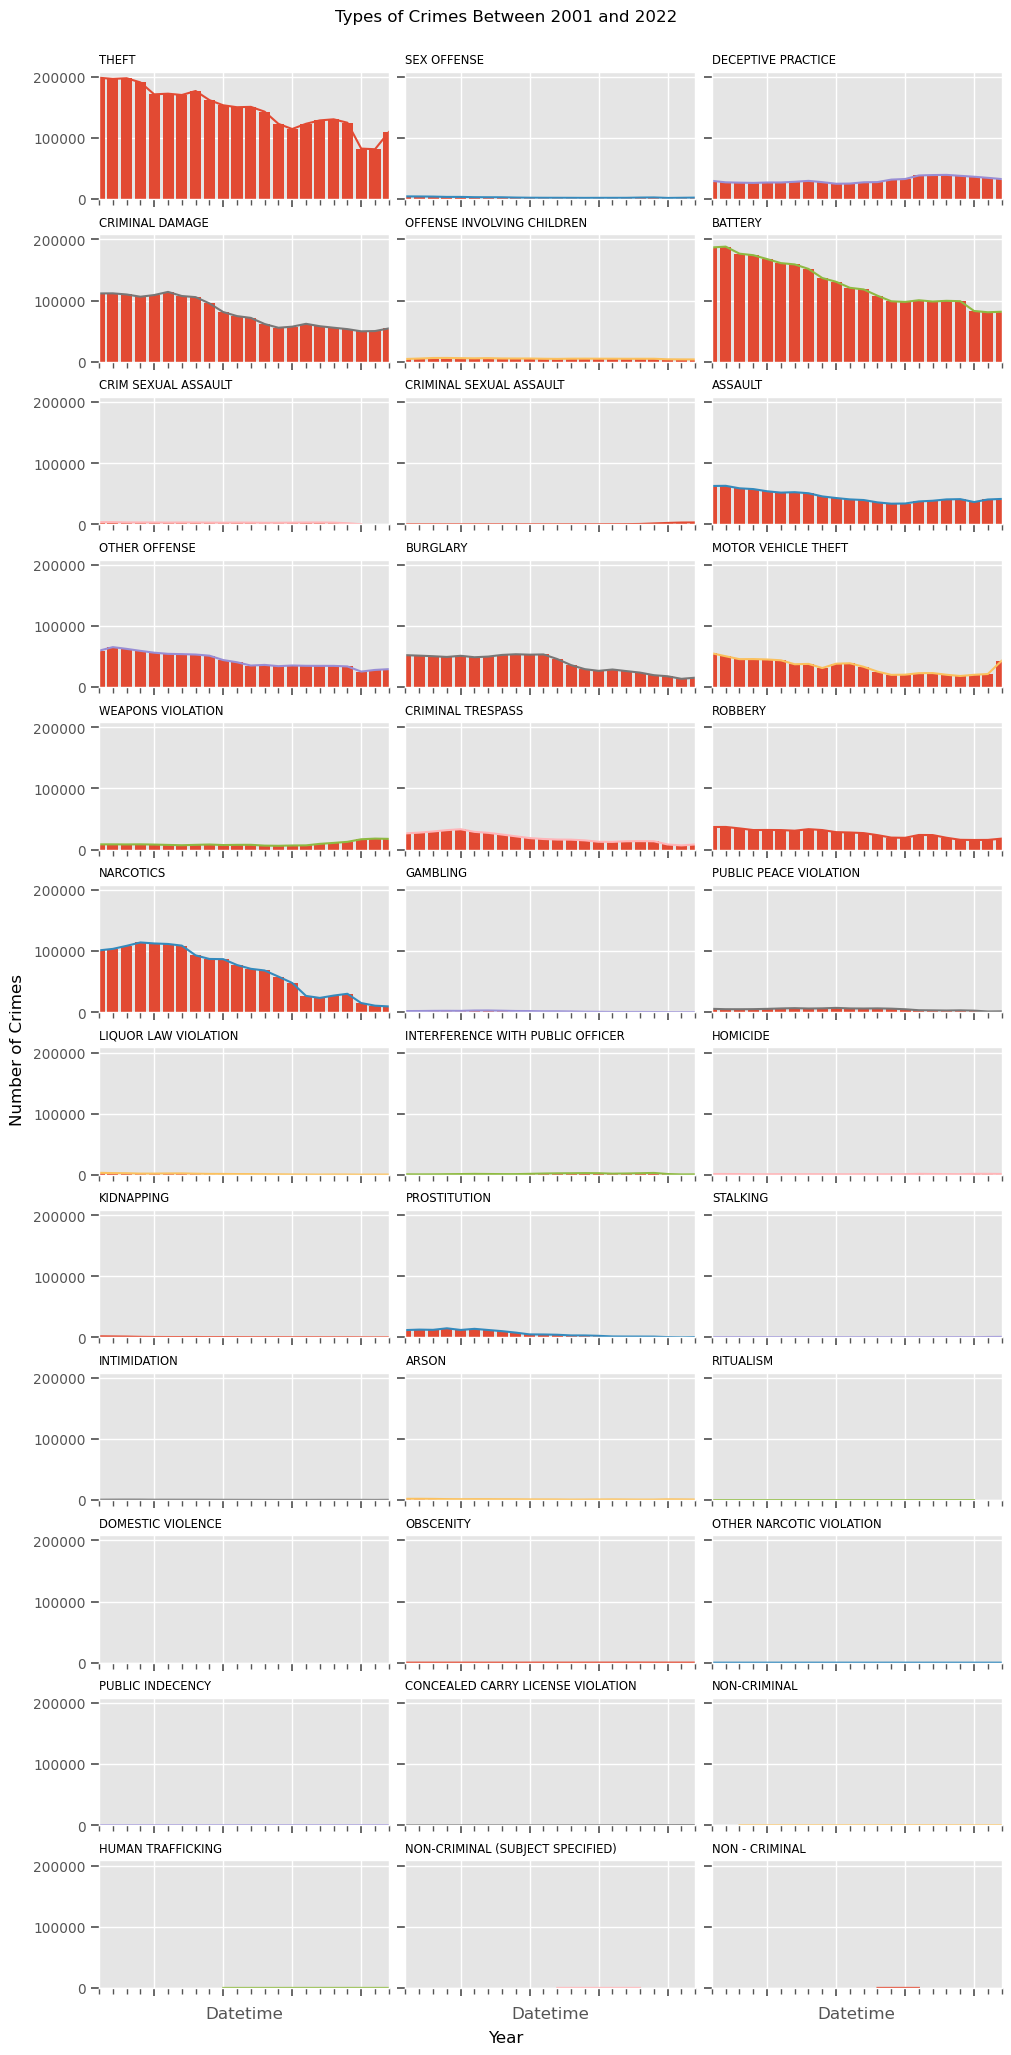

In [46]:
#Plot the types of crimes by year
fig=ax.get_figure()
fig, axes = plt.subplots(12, 3, figsize=(10, 20), constrained_layout=True, sharex=True, sharey=True)
crimesdf.plot(subplots=True, ax=axes, legend=None)
#For loop to label individual plots
for gn, ax in enumerate(axes.flat):
    column_name = list(crime_dict.keys())[gn]
    y = crimesdf[column_name]
    ax.bar(crimesdf.index, y)  
    ax.set_title(column_name, fontsize='small', loc='left')
#Set title/labels
fig.suptitle('Types of Crimes Between 2001 and 2022', x=0.5, y=1.02)
fig.supxlabel('Year')
fig.supylabel('Number of Crimes')
#Set ticklables
for ax in axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), fontsize='small')

plt.show();

#adapted from source: matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html

### Are there any individual crimes that are doing the opposite?
      * Over all there is a decrease in the number of crimes
      * There are no crimes that appear to be doing the opposite. There are several crimes don't have enough data to make any assumptions from.

### Q1.  Is the total number of crimes increasing/decreasing across the years?
***Overall the total number of crimes is decreasing across the years***

## Senario 2:  Comparing Holidays

In [47]:
#copy df
hdf = df.copy()
hdf.head(2)

,Date,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
1,2001-01-01 01:00:00,1317937,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00


In [48]:
hdf.columns

Index(['Date', 'ID', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude', 'Datetime'],
      dtype='object')

In [50]:
#Set format for datetime and change dtype
date_format = "%m/%d/%Y %H:%M:%S %p"

hdf['Datetime'] = pd.to_datetime(ts['Date'], format=date_format)
hdf = hdf.sort_values('Datetime')
hdf.head(2)

ValueError: time data '2001-01-01 01:00:00' does not match format '%m/%d/%Y %H:%M:%S %p' (match)

#### What are the top 3 holidays with the largest number of crimes?

In [ ]:
keep_cols=["Datetime", "Primary Type"]
hdf=hdf[keep_cols]
hdf.info()

In [ ]:
#make a date range that covers the full dataset
all_days = pd.date_range(hdf['Datetime'].min(), hdf['Datetime'].max())
all_days

In [ ]:
#create an instance of the US only holidays
us_holidays = country_holidays('US')


In [ ]:
#Get a list of all holidays
holidays = [us_holidays.get(day) for day in all_days]
holidays[:5]
            

In [ ]:
hdf['US Holiday'] = [us_holidays.get(day) for day in hdf['Datetime']]
hdf.head(2)

## Save a binary is holiday feature
#hdf['Is_Holiday'] = hdf['US Holiday'].notna()
#hdf['Is_Holiday'].value_counts()

In [ ]:
top_holidays = [hdf['US Holiday'].value_counts()]
top_holidays

In [ ]:
#Create list with crimes by holiday
crimes_by_holiday = hdf.groupby("US Holiday")['Primary Type'].value_counts()
crimes_by_holiday


In [ ]:
crimes_by_holiday = hdf.groupby(["US Holiday", "Primary Type"]).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))
ax=crimes_by_holiday.plot(kind='bar', stacked=True, figsize=(14,8))

ax.set_title('Crime Counts Over Time by US Holidays')
ax.set_xlabel('US Holiday')
ax.set_ylabel('Total Number of Crimes')
plt.legend(title='US Holiday', bbox_to_anchor=(1,1), loc='best')
###Source: matplolib.org/3.1.1/spi/_as_gen/matplolib.pyplot.legend.html
plt.show();

### The top 3 holidays with the largest number of crimes are:
    *  New Years Day
    *  Independace Day
    *  Labor Day

##### What are the most crimes on those days

In [ ]:
hdf.head(2)

In [ ]:
top_holidays = ["New Year's Day", "Independence Day","Labor Day"]
top_crimes = hdf[hdf['US Holiday'].apply(lambda h: h in top_holidays)]
top_crimes.info()
### Adapted from: alexmalins.com/blog/using-pandas-isin-method-with-pyton-on-holidays-package/

In [ ]:
top_crimes['US Holiday'].nunique()

In [ ]:
top_crimes['Primary Type'].nunique()

In [ ]:
mostcrimes=top_crimes.groupby(["US Holiday", "Primary Type"]).filter(lambda c:len(c)>1500)

In [ ]:
holiday_crimes = mostcrimes.groupby(["US Holiday", "Primary Type"]).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))
ax=holiday_crimes.plot(kind='bar', stacked=True, figsize=(14,8))
ax.set_title("Crimes Committed on New Year's Day, Independence Day, and Labor Day", fontsize=20)
ax.set_xlabel('Holidays', fontsize=15)
ax.set_ylabel('Total Crimes', fontsize=15)
plt.legend(title='Crimes', bbox_to_anchor=(1,1), loc='best')
###Source: matplolib.org/3.1.1/spi/_as_gen/matplolib.pyplot.legend.html

#Annotate each bar with the total count
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(f'{height}', (x+width/2, y+height/2), ha='center', fontsize=13, color='black')
###Source: https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
plt.show();

#### For each of the top 3 holidays with the most crime, 
#### What are the top 5 most common crimes on that holiday?

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-9wq8{border-color:inherit;text-align:center;vertical-align:middle}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-8zwo{font-style:italic;text-align:left;vertical-align:top}
.tg .tg-rvyq{border-color:inherit;font-style:italic;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-9wq8" colspan="6"><span style="font-weight:bold">Top 5 Crimes Per Day</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-baqh"><span style="font-weight:bold">By Holidays</span></td>
    <td class="tg-8zwo" colspan="5">In order from most committed to least</td>
  </tr>
  <tr>
    <td class="tg-rvyq">New Year's Day</td>
    <td class="tg-0pky">Assault</td>
    <td class="tg-0pky">Battery</td>
    <td class="tg-0pky">Criminal Damage</td>
    <td class="tg-0pky">Deceptive Practice</td>
    <td class="tg-0pky">- Offense Involving Children <br> - Other Offence</td>
  </tr>
  <tr>
    <td class="tg-rvyq">Independence Day</td>
    <td class="tg-0pky">Battery</td>
    <td class="tg-0pky">Assault</td>
    <td class="tg-0pky">Criminal Damage</td>
    <td class="tg-0pky">Theft</td>
    <td class="tg-0pky">Narcotics</td>
  </tr>
  <tr>
    <td class="tg-rvyq">Labor Day</td>
    <td class="tg-0pky">Battery</td>
    <td class="tg-0pky">Assault</td>
    <td class="tg-0pky">Criminal Damage</td>
    <td class="tg-0pky">Narcotics</td>
    <td class="tg-0pky">Theft</td>
  </tr>
</tbody>
</table>

## Senario 3:   Comparing Police Districts:

In [ ]:
#Create a df for this data set
district = df.copy()
district.head(2)

In [ ]:
#Set format for datetime and change dtype
date_format = "%m/%d/%Y %H:%M:%S %p" 

district['Datetime'] = pd.to_datetime(district['Date'], format=date_format)
district = district.sort_values('Datetime')
district.head(2)

In [ ]:
dist=district.copy()

In [ ]:
dist['Year'] = dist['Datetime'].dt.year

In [ ]:
dist['Year'].value_counts()

In [ ]:
dist=dist[['ID', 'Year', 'District']]
dist.info()

In [ ]:
dist2022=dist.loc[(dist['Year']==2022)]
dist2022.info()


In [ ]:
crimes_by_dist=dist2022.groupby(['District']).size()
crimes_by_dist.head(3)

In [ ]:
crimes_by_dist.plot(kind='bar');

In [ ]:
# Plotting
plt.figure(figsize=(12, 6),)
ax=crimes_by_dist.plot(kind='bar', color='green')
ax.set_title("Crimes Committed in 2022 by District", fontsize=20)
ax.set_xlabel('District', fontsize=15)
ax.set_ylabel('Total # of Crimes', fontsize=15)

#Annotate each bar with the total count
for p in ax.patches:
   width, height = p.get_width(), p.get_height()
   x,y = p.get_xy()
   ax.annotate(f'{height}', (x+width, y+height), fontsize=10, color='black')
###Source: https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas
plt.show();

### Which district had the most crimes in 2022?

***District 8 had the most crimes with 14,805 crimes being committed in 2022***

### Which had the least?

***District 31 had the least number of crimes with only 15 crimes being committed in 2022***